In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("C:/Users/biswa/Documents/lpu subjects/soft-computing research/heart_disease_data.csv")

In [3]:
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   48    1   0       130   256    1        0      150      1      0.0      2   
1   61    1   0       148   203    0        1      161      0      0.0      2   
2   44    0   2       118   242    0        1      149      0      0.3      1   
3   47    1   0       110   275    0        0      118      1      1.0      1   
4   56    1   3       120   193    0        0      162      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   1     3       0  
2   1     2       1  
3   1     2       0  
4   0     3       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5 

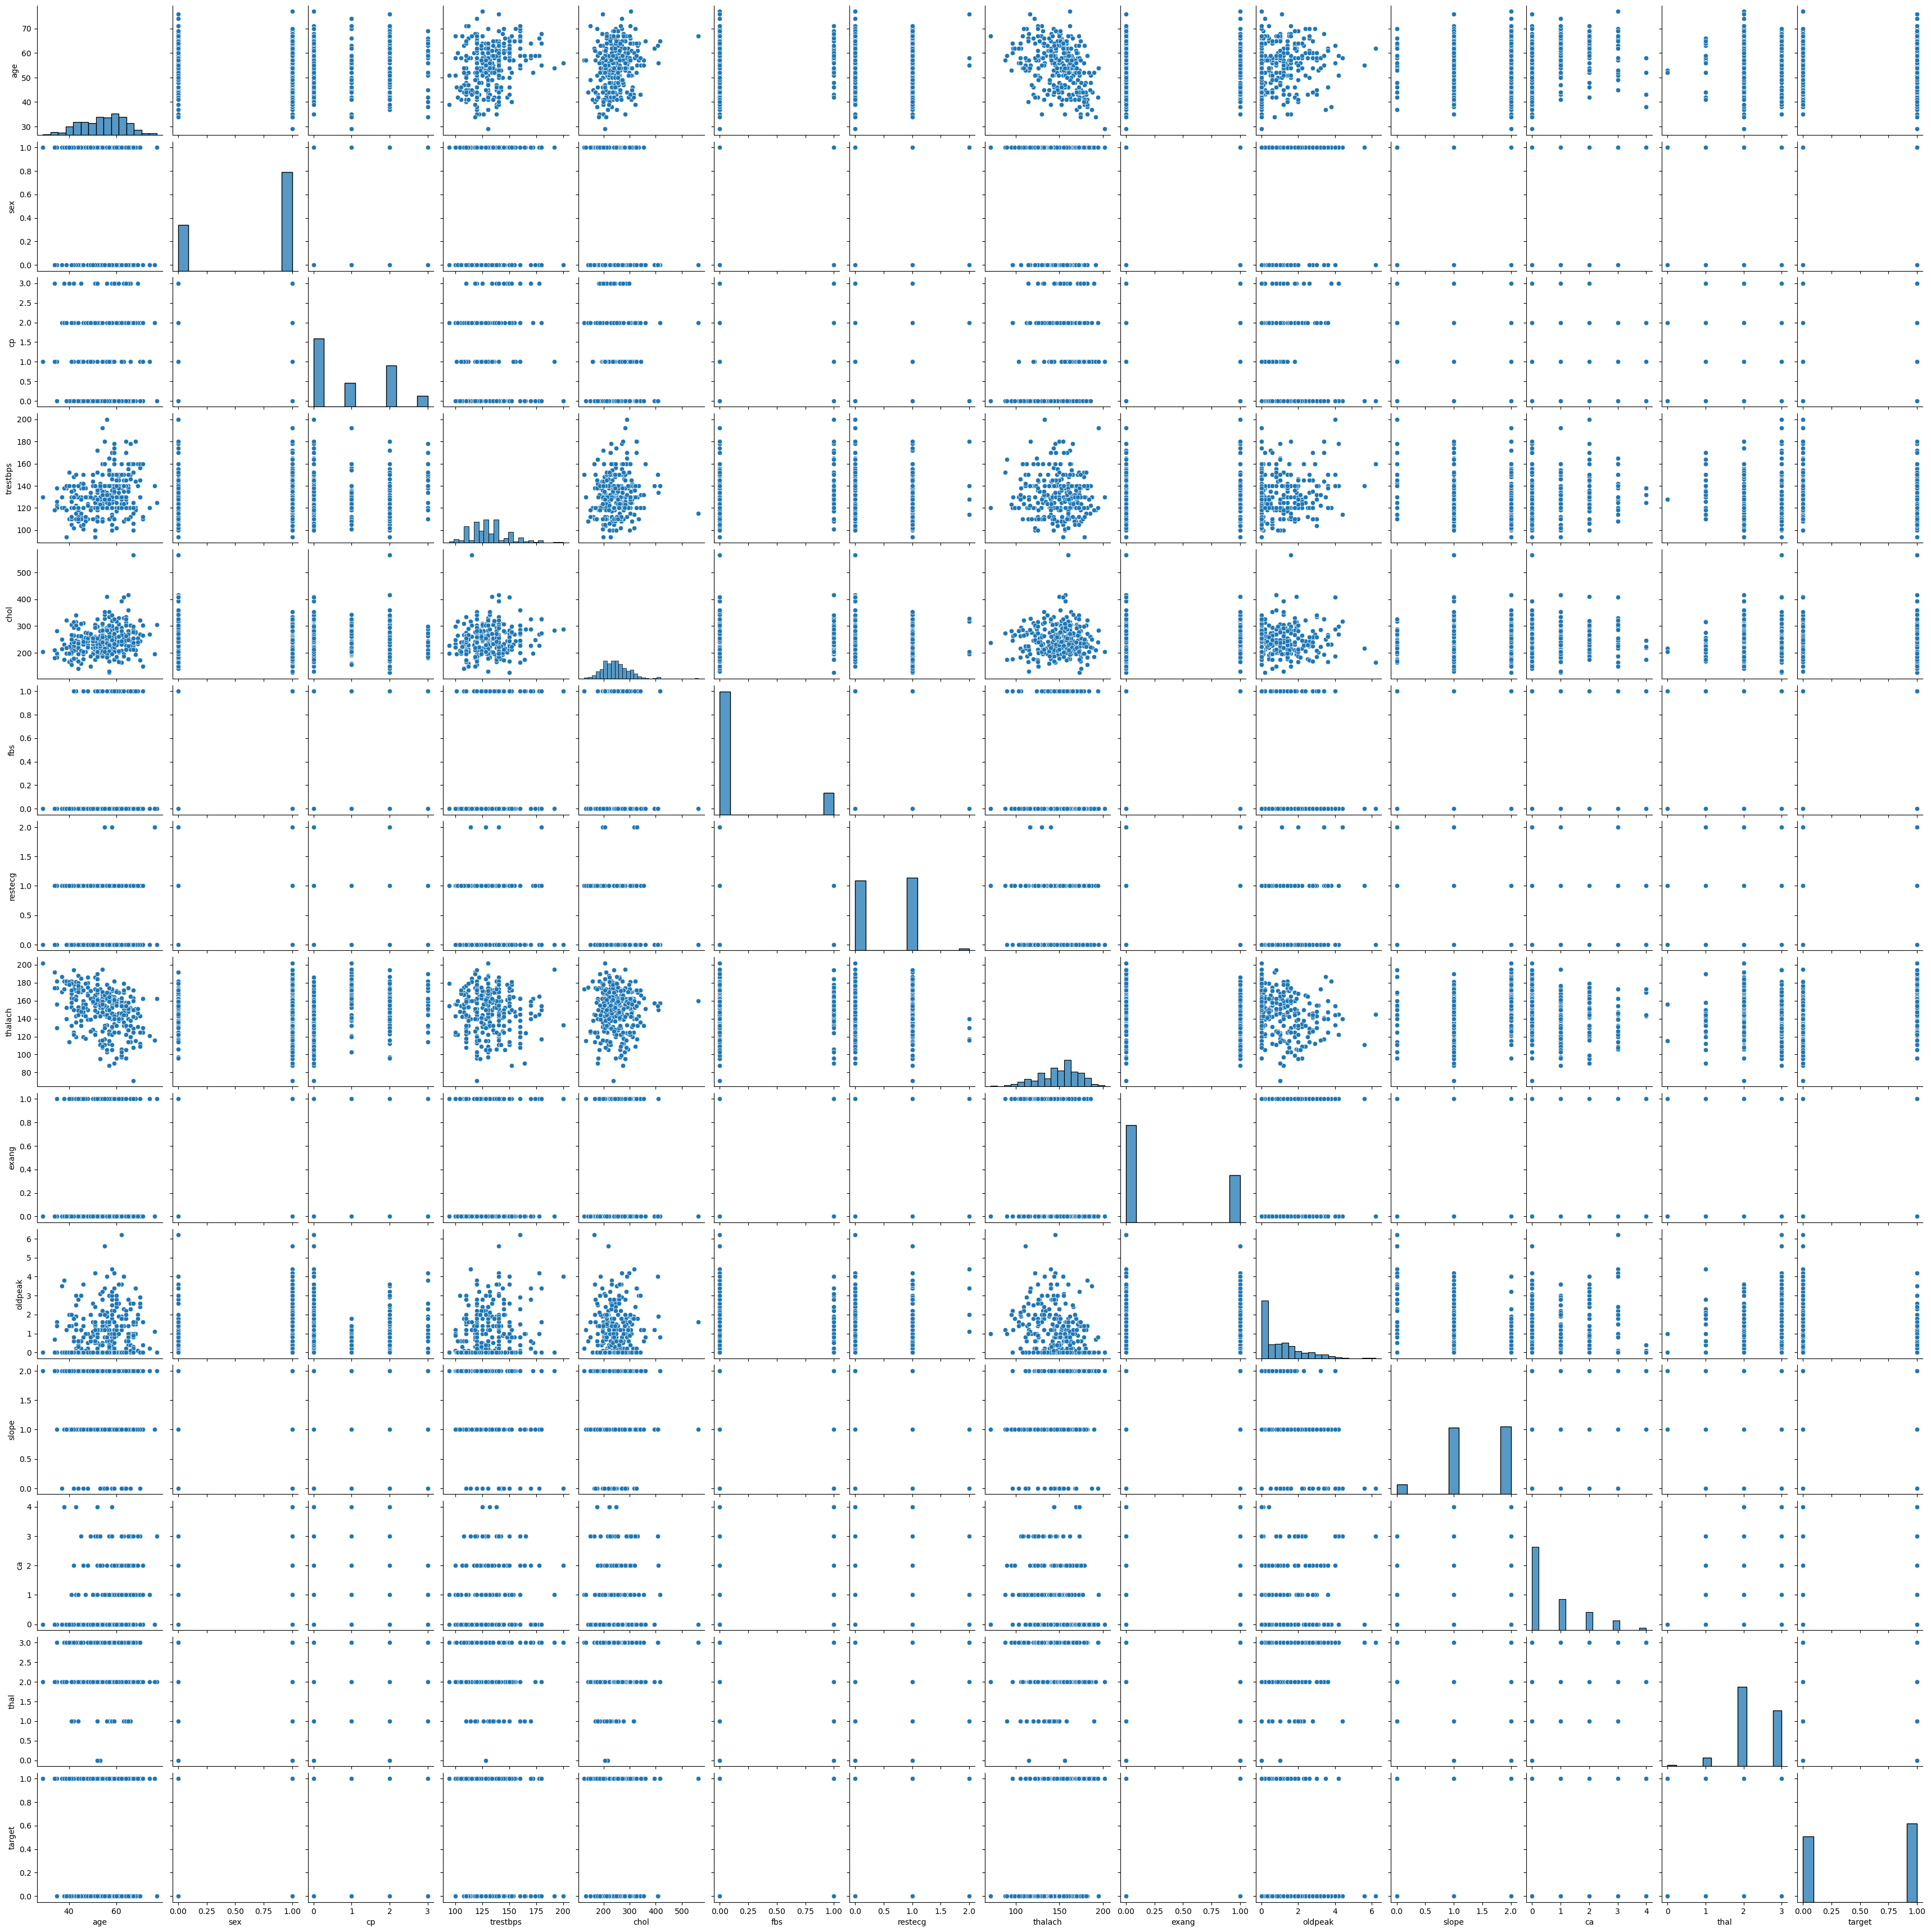

In [4]:

sns.pairplot(df)

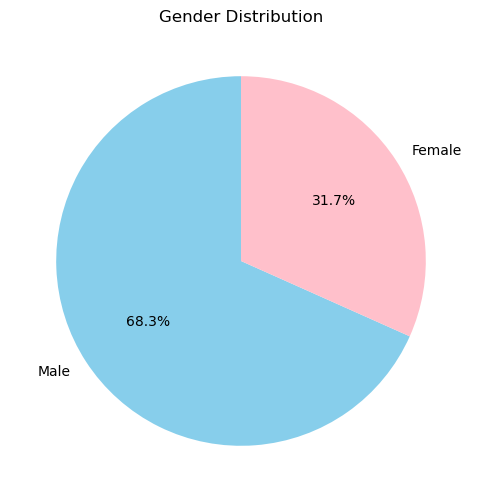

In [5]:
gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']  
colors = ['skyblue', 'pink']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.show()

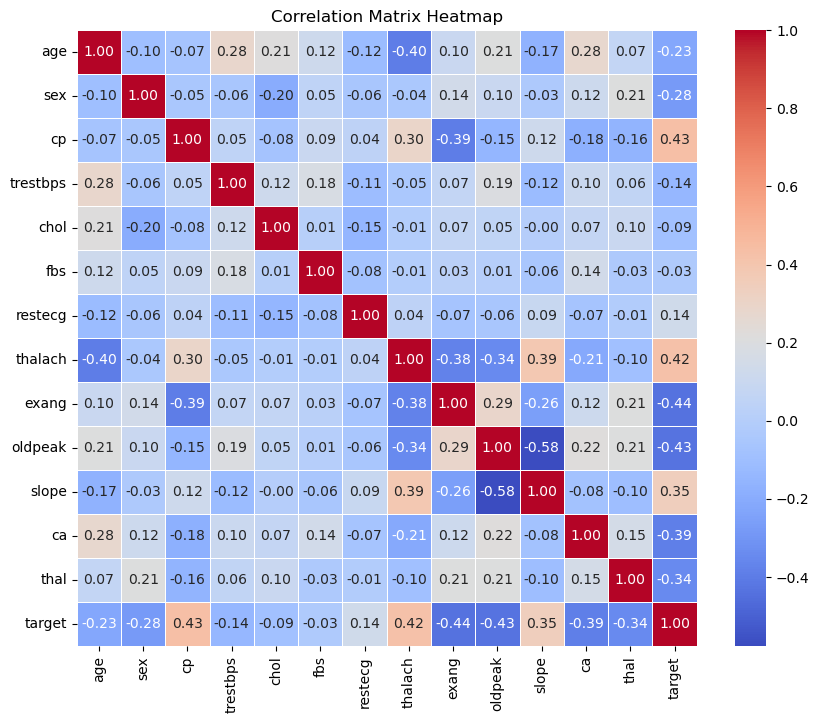

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:

X = df.drop('target', axis=1) 
y = df['target']              

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [10]:
param_grids = {
    "Decision Tree": {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
}



Decision Tree Model:
Accuracy Without Hyperparameter Tuning: 0.97
Without Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.95      1.00      0.97        72

    accuracy                           0.97       122
   macro avg       0.97      0.96      0.97       122
weighted avg       0.97      0.97      0.97       122

Accuracy With Hyperparameter Tuning: 0.97
With Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.95      1.00      0.97        72

    accuracy                           0.97       122
   macro avg       0.97      0.96      0.97       122
weighted avg       0.97      0.97      0.97       122


Random Forest Model:
Accuracy Without Hyperparameter Tuning: 0.95
Without Hyperparameter Tuning Classification Report:
              

C:\Users\biswa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy With Hyperparameter Tuning: 0.89
With Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.88      0.94      0.91        72

    accuracy                           0.89       122
   macro avg       0.90      0.88      0.89       122
weighted avg       0.89      0.89      0.89       122



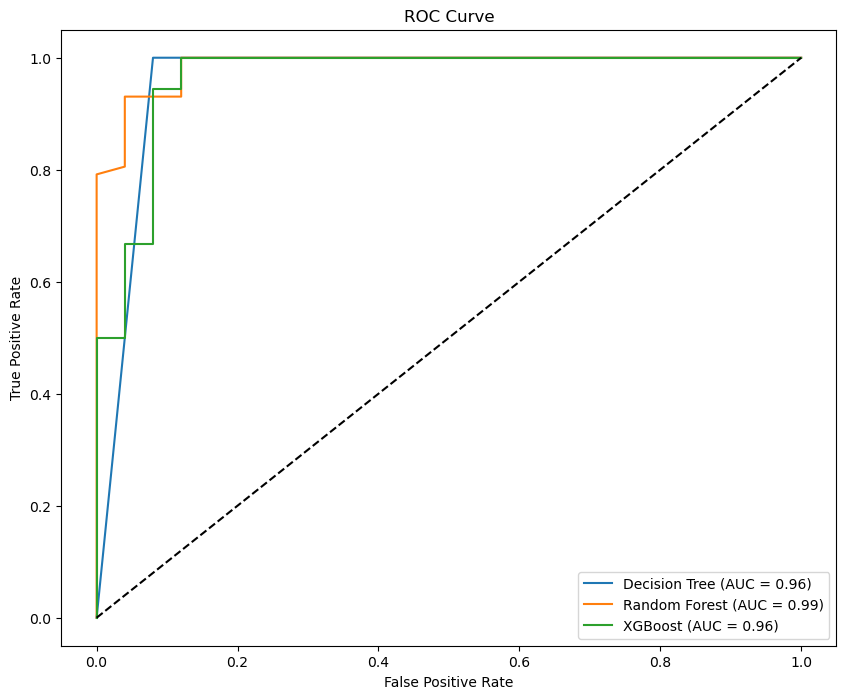

In [11]:
results = {}
plt.figure(figsize=(10, 8))  # Setup for ROC Curve Plot

for name, model in models.items():
    print(f"\n{name} Model:")

    # Without RandomizedSearchCV
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Without Hyperparameter Tuning: {accuracy:.2f}")
    print("Without Hyperparameter Tuning Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve (Without Hyperparameter Tuning)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    
    # With RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], n_iter=10, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"Accuracy With Hyperparameter Tuning: {accuracy_tuned:.2f}")
    print("With Hyperparameter Tuning Classification Report:")
    print(classification_report(y_test, y_pred_tuned))
    
    # Store Results
    results[name] = (confusion_matrix(y_test, y_pred_tuned), random_search.best_params_)

# Final ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')  # Reference Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

